<a href="https://colab.research.google.com/github/achluky/EI7007-Pebelejaran-Mesin-Lanjut/blob/main/Tugas_1A_Hyperparameter_Tuning_in_Convolutional_Neural_Networks_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persoalan klasifikasi dengan menggunakan convolutional neural network (CNN)

## Ahmad Luky Ramdani 33221020

Pada bagian ini proses eksplorasi difokuskan dalam permasalahan klasifikasi. Dataset yang digunakan adalah Fashion-MNIST. 


## Dataset Fashion-MNIST
Fashion-MNIST merupakan dataset yang diperoleh dari kumpulan gambar produk fashion. Sebelumnya, pada tahun 1998 Fashion-MNIST sudah memiliki beberapa kumpulan data namun berupa numerik MNIST yang ditulis dengan tangan yang diperkenalkan oleh LeCun et al, dan itu yang menjadi kumpulan data terbesar yang akan digunakan sebagai kumpulan data uji dalam deep learning. Dataset Fashion-MNIST biasanya memiliki jumlah yang sama, namun akan ada jenis klasifikasi yang berbeda, karena klasifikasi dari Fashion-MNIST yaitu terdiri dari kategori

1. T-shirt
2. Trouser
3. Pullover
4. Coat
5. Dress
6. Sandals
7. Shirt
8. Sneaker
9. Bag
10. Ankle Boots

## Isi dataset
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

Pembagian kelas pada data adalah


| Kelas      | Deskripsi |
| ----------- | ----------- |
| 0   | T-shirt/top |
| 1   | Trouser |
| 2   | Pullover |
| 3   | Dress |
| 4   | Coat  |
| 5   | Sandal        |
| 6   | Shirt        |
| 7   | Sneaker        |
| 8   | Bag|
| 9   | Ankle boot|

Sumber: [Keras](https://keras.io/api/datasets/fashion_mnist/)

## Load package dan Library

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf
import seaborn as sns
!pip install mitdeeplearning
import mitdeeplearning as mdl

     |████████████████████████████████| 2.1 MB 18.8 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=60e9b605999d85f7666857790bf0b387d50dfa6afc5cc187be1c6251a2bd98d0
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


## Load Dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

print(f'Dimensi Training Data',train_images.shape)
print(f'Dimensi Training Data (Label)',train_labels.shape)

print(f'Dimensi Test Data',test_images.shape)
print(f'Dimensi Test Data (Label)',test_labels.shape)


In [3]:
labels = {
          0: "T-shirt/top", 
          1: "Trouser", 
          2: "Pullover", 
          3: "Dress", 
          4: "Coat",
          5: "Sandal", 
          6: "Shirt", 
          7: "Sneaker", 
          8: "Bag", 
          9: "Ankle Boot"
}

## Eksplorasi Data

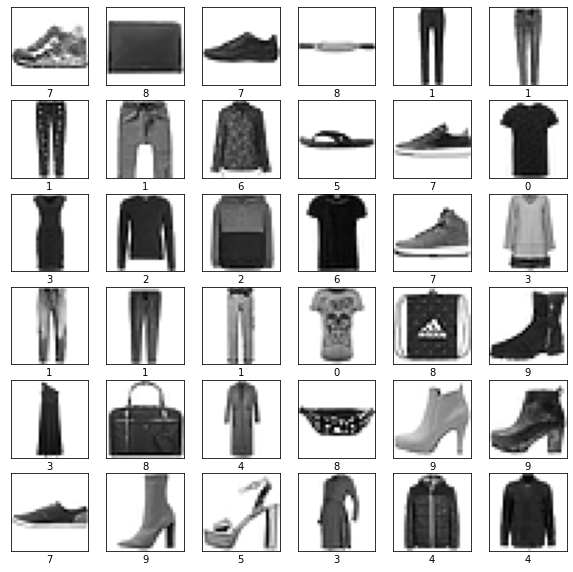

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## Model

Parameter default yang digunakan

In [5]:
BATCH_SIZE = 64
EPOCHS = 5

Berikut adalah code yang digunakan untuk melakukan eksplorasi hyper parameter. 

Proses penentuan hyperparameter terbaik, dilakukan dengan melakukan uji coba. Adapun format uji coba parameter dapat dilihat pada dokumen excel pada link berikut

[Laporan](https://github.com/achluky/EI7007-Pebelejaran-Mesin-Lanjut/blob/main/Data%20Hasil%20Eksplorasi/Tugas_1B_Regresi_Boston_Housing_Price_dengan_ANN.xlsx)


In [ ]:
def build_cnn_model(param):
    cnn_model = tf.keras.Sequential([
        # 1 Conv Layer
        tf.keras.layers.Conv2D(
            filters=128,  # Jumlah Filter = {8, 16, 32, 64, 128} # Best Parameter 128
            kernel_size=(3,3), # Best Parameter = {3x3, 5x5}
            activation=tf.nn.relu
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # 2 Conv Layer
        tf.keras.layers.Conv2D(
            filters=128,  # Jumlah Filter = {8, 16, 32, 64, 128}
            kernel_size=(param,param), 
            activation=tf.nn.relu
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # MLP
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu), # Jumlah Hidden Unit = {32, 64, 128}
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return cnn_model

# Ukuran Filter = {1x1,3x3, 5x5, 7x7, 9x9}
params = [1, 3, 5, 7, 9] # Filter 1 3 5 7 9
for param in params:
  print('#=================================================================#', param)
  cnn_model = build_cnn_model(param)
  cnn_model.predict(train_images[[0]])
  cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  from datetime import datetime
  start_time = datetime.now()
  history = cnn_model.fit(
                train_images, 
                train_labels, 
                batch_size=BATCH_SIZE, 
                epochs=EPOCHS)
  end_time = datetime.now()

  # Testing
  test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_acc)
  print('Test Losse:', test_loss)
  print('Running time: ', end_time - start_time)

Konfigurasi terbaik yang didapatkan adalah
* Jumlah Layer ConV  = 2
* Jumlah Filter Layer 1 ConV = 128
* Ukuran Filter Layer 1 ConV = 3x3
* Fungsi Aktivasi Layer 1 ConV = ReLu
* Jumlah Filter Layer 2 ConV = 128
* Ukuran Filter Layer 2 ConV = 9x9
* Fungsi Aktivasi Layer 2 ConV = ReLu
* Jumlah Hidden Unit pada Fully Connected Layer = 128

Berikut Code model dengan configurasi hyperparameter terbaik



In [14]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # ConV Ke 1
        tf.keras.layers.Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation=tf.nn.relu
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # ConV Ke 2
        tf.keras.layers.Conv2D(
            filters=128,
            kernel_size=(9,9), 
            activation=tf.nn.relu
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return cnn_model

cnn_model = build_cnn_model()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = cnn_model.fit(
              train_images, 
              train_labels, 
              batch_size=BATCH_SIZE, 
              epochs=EPOCHS,
              validation_data=(test_images, test_labels)
              )

Epoch 1/5
938/938 [==============================] - 404s 430ms/step - loss: 0.4390 - accuracy: 0.8425 - val_loss: 0.3389 - val_accuracy: 0.8768
Epoch 2/5
938/938 [==============================] - 398s 425ms/step - loss: 0.2843 - accuracy: 0.8963 - val_loss: 0.2989 - val_accuracy: 0.8918
Epoch 3/5
938/938 [==============================] - 399s 425ms/step - loss: 0.2401 - accuracy: 0.9117 - val_loss: 0.2911 - val_accuracy: 0.8936
Epoch 4/5
938/938 [==============================] - 399s 426ms/step - loss: 0.2055 - accuracy: 0.9243 - val_loss: 0.2730 - val_accuracy: 0.9011
Epoch 5/5
938/938 [==============================] - 398s 424ms/step - loss: 0.1768 - accuracy: 0.9347 - val_loss: 0.2654 - val_accuracy: 0.9052


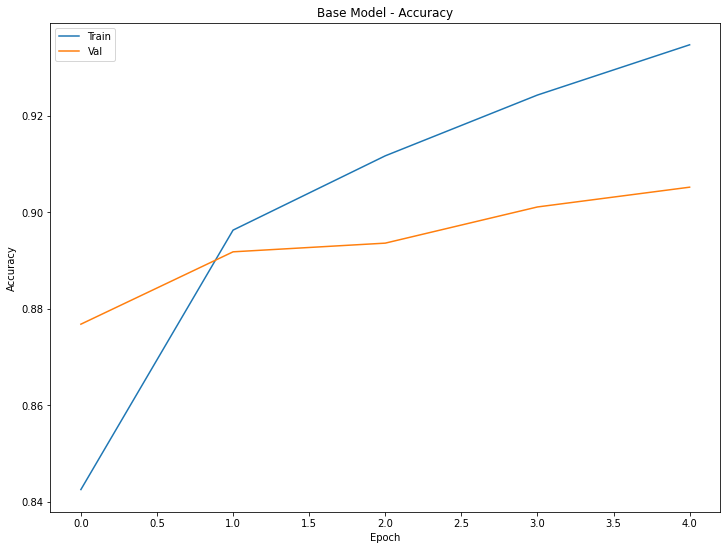

In [15]:
hist = pd.DataFrame(history.history)
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(history.epoch, hist['accuracy'], label='Train')
plt.plot(history.epoch, hist['val_accuracy'], label='Val')
plt.title('Base Model - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('BaseModel-Accuracy.jpg')
plt.show()

Dari Gambar di atas didapatkan informasi akurasi adalah 0.9347 (93.47%), namun terjadi overfiting. Sehingga dilakukan EarlyStopping. Maka maksimal epoch adalah 1dn akurasi 0.8900 (89%)

## Prediksi

In [ ]:
predictions = cnn_model.predict(test_images)
predictions[0]

array([1.18676645e-07, 3.86321641e-10, 3.97235226e-07, 8.76178660e-07,
       6.74310115e-07, 7.71651918e-04, 1.33172477e-06, 1.67499122e-03,
       1.79012181e-06, 9.97548163e-01], dtype=float32)

In [ ]:
prediction = np.argmax(predictions[0]) 
print(prediction)

9


Label of this is: 9


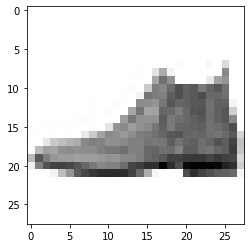

In [ ]:
print("Label of this is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

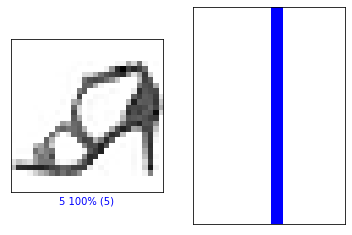

In [ ]:
image_index = 82 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

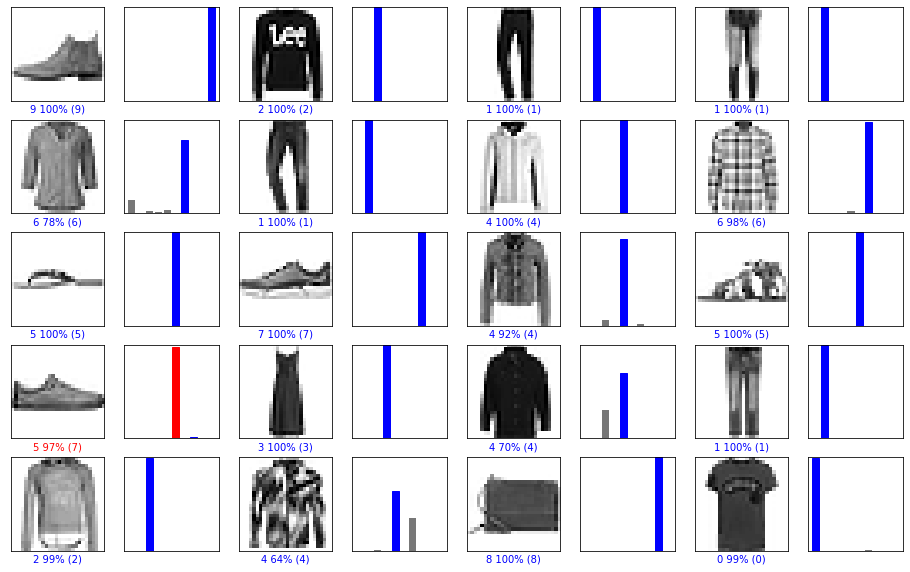

In [ ]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)
